In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Q1

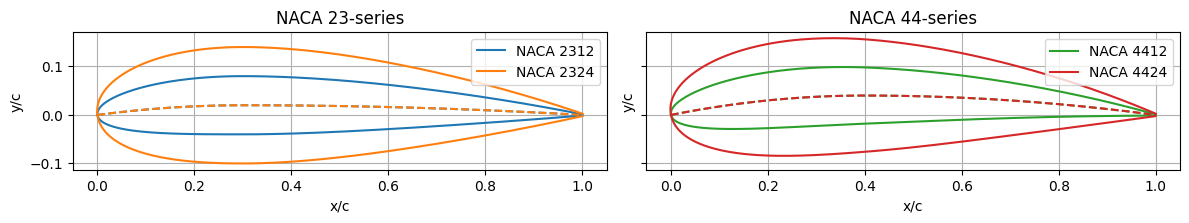

In [21]:
def naca_airfoil(m_percent, p_percent, t_percent,
                  n_points=200, plot=True, ax=None, label=None, color=None):
    """
    Build a 4-digit NACA airfoil and (optionally) plot it.

    Parameters
    ----------
    m_percent : float
        Maximum camber in percent of chord (e.g. 2 for NACA 2312).
    p_percent : float
        Location of maximum camber in tenths of chord (e.g. 3 for NACA 2312).
    t_percent : float
        Maximum thickness in percent of chord (e.g. 12 for NACA 2312).
    n_points : int
        Number of points along the chord (cosine spaced).
    plot : bool
        If True, plot the airfoil.
    ax : matplotlib.axes.Axes or None
        Axis to plot in. If None and plot=True, a new figure is created.
    label : str
        Base label for legend entries.

    Returns
    -------
    x : ndarray
        x/c coordinates along the chord.
    y_upper : ndarray
        y/c of the upper surface.
    y_lower : ndarray
        y/c of the lower surface.
    y_camber : ndarray
        y/c of the camber line.
    """

    # Convert to fractions of chord
    m = m_percent / 100.0      # max camber
    p = p_percent / 10.0       # location of max camber
    t = t_percent / 100.0      # max thickness

    # Cosine-spaced x for better LE resolution
    beta = np.linspace(0.0, np.pi, n_points)
    x = 0.5 * (1 - np.cos(beta))   # 0 -> 1

    # ---- Camber line and its slope ----
    y_camber = np.zeros_like(x)
    dyc_dx   = np.zeros_like(x)

    # Region 1: 0 <= x/c <= p
    idx1 = x <= p
    x1 = x[idx1]
    y_camber[idx1] = (m / p**2) * (2*p*x1 - x1**2)
    dyc_dx[idx1]   = (2*m / p**2) * (p - x1)

    # Region 2: p < x/c <= 1
    idx2 = x > p
    x2 = x[idx2]
    y_camber[idx2] = (m / (1 - p)**2) * ((1 - 2*p) + 2*p*x2 - x2**2)
    dyc_dx[idx2]   = (2*m / (1 - p)**2) * (p - x2)

    # Local camber-line angle
    theta = np.arctan(dyc_dx)

    # ---- Thickness distribution (NACA 4-digit) ----
    yt = 5 * t * (0.2969*np.sqrt(x) - 0.1260*x
                  - 0.3516*x**2 + 0.2843*x**3 - 0.1015*x**4)

    # ---- Upper & lower surfaces (measured ⟂ to camber line) ----
    x_upper = x - yt * np.sin(theta)
    y_upper = y_camber + yt * np.cos(theta)

    x_lower = x + yt * np.sin(theta)
    y_lower = y_camber - yt * np.cos(theta)

    # ---- Plot if requested ----
    if plot:
        if ax is None:
            fig, ax = plt.subplots(figsize=(6, 4))

        ax.plot(x_upper, y_upper, color=color, label=label)
        ax.plot(x_lower, y_lower, color=color)
        ax.plot(x,       y_camber, "--", color=color)

        ax.set_xlabel("x/c")
        ax.set_ylabel("y/c")
        ax.set_aspect("equal", "box")
        ax.grid(True)
        ax.legend()

    return x, y_upper, y_lower, y_camber
    
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

x_2312, yU_2312, yL_2312, C_2312 = naca_airfoil(2, 3, 12, plot=True, ax=axes[0], color="#1f77b4", label="NACA 2312")
x_2324, yU_2324, yL_2324, C_2324 = naca_airfoil(2, 3, 24, plot=True, ax=axes[0], color="#ff7f0e", label="NACA 2324")

axes[0].set_title("NACA 23-series")

x_4412, yU_4412, yL_4412, C_4412 = naca_airfoil(4, 4, 12, plot=True, ax=axes[1], color="#2ca02c", label="NACA 4412")
x_4424, yU_4424, yL_4424, C_4424 = naca_airfoil(4, 4, 24, plot=True, ax=axes[1], color="#d62728", label="NACA 4424")

axes[1].set_title("NACA 44-series")

plt.legend()
plt.tight_layout()
plt.show()

# Q2